## Diesel Cycle

50.53487753053865


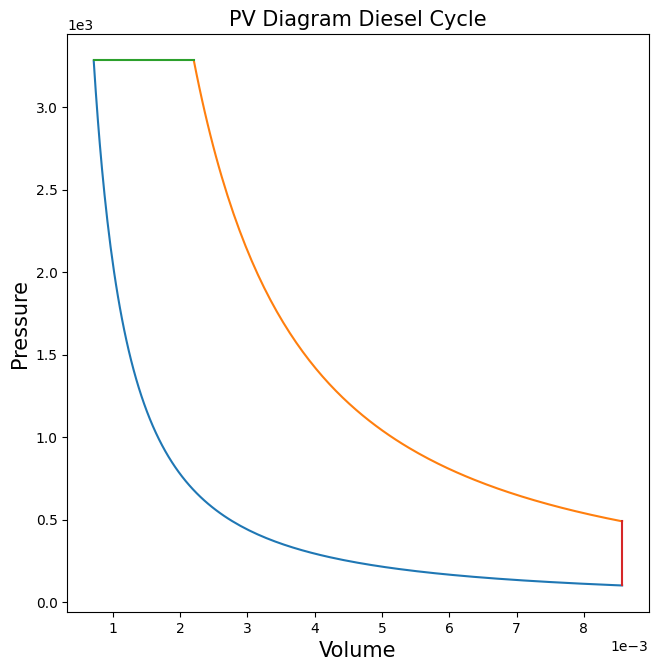

In [17]:
from numpy import sin, cos, pi
import numpy as np
import matplotlib.pyplot as plt

#inputs

d = 0.1  # bore mm
s = 0.1  # stroke  mm
l = 0.15 # lenth of CR  mm
r = 12   # Compression Ratio

P1 = 101.3
T1 = 300  # Kelvin
gamma = 1.4
T3 = 2500  # maximum temperature of the cycle (Kelvin)

def volume(d,s,l,r,theta):
  Vs = (pi/4)*d**2  # swept volume
  Vc = Vs/(r-1)     # clearance volume

  term1 = 1/(r-1)
  term2 = 1 + (2/s) - cos(theta)
  term3 = np.sqrt((2/s)**2 - (sin(theta))**2)

  V = Vs*(term1 + 0.5*(term2 - term3))

  return V

Vs = (pi/4)*d**2
Vc = Vs/(r-1)

V1 = Vs + Vc
V2 = Vc
V4 = V1
P2 = P1*(V1/V2)**gamma
T2 = T1*r**(gamma-1)
P3 = P2
V3 = V2*(T3/T2)
# for compression adiabati process - PV**gama = constant
P4 = P3*(V3/V4)**gamma

theta = 0
while theta<pi:
  theta += 0.001
  V_theta = volume(d,s,l,r,theta)
  if(0 < (V_theta-V3) < 0.001):
    break

print(theta*180/pi)

V_comp = volume(d,s,l,r,np.linspace(0,pi,180))
P_comp = P1*(V1/V_comp)**gamma

V_exp = volume(d,s,l,r,np.linspace(pi,theta,180))
P_exp = P3*(V3/V_exp)**gamma

plt.figure(figsize=(7.5,7.5))
plt.plot(V_comp,P_comp)
plt.plot(V_exp,P_exp)
plt.plot([V2,V3],[P2,P3])
plt.plot([V4,V1],[P4,P1])

plt.title("PV Diagram Diesel Cycle", fontsize = 15)
plt.xlabel("Volume", fontsize = 15)
plt.ylabel("Pressure", fontsize = 15)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.show()
